<a href="https://colab.research.google.com/github/aryarajat/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
netflix_df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# Making a two copy of dataset

# df1 is used in preprocessing of clustring
df1=netflix_df.copy()

# df2 is used to check the predicted output
df2=netflix_df.copy()

In [ ]:
# First look of the dataset
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [ ]:
# Checking the shape of the dataframe
netflix_df.shape

(7787, 12)

In [ ]:
# Columns name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Find the various statistic for all the columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s3679,Movie,The Short Game,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# **Data Wrangling**

In [ ]:
# Here we check the duplicate observtions in our dataset
duplicate = netflix_df[netflix_df.duplicated()]

In [ ]:
# Printing the duplicate observations
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### **Observation:**
Our dataset does not contain any duplicate observations.

In [ ]:
# Checking the NAN/Null values in our dataset
for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_rate > 0 :
        print("{} null values percentage: {}%".format(i,round(null_rate,2))," \n null value counts:",netflix_df[i].isna().sum())

director null values percentage: 30.68%  
 null value counts: 2389
cast null values percentage: 9.22%  
 null value counts: 718
country null values percentage: 6.51%  
 null value counts: 507
date_added null values percentage: 0.13%  
 null value counts: 10
rating null values percentage: 0.09%  
 null value counts: 7


### **Observations:** 


*   The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems.



## **Null Value Treatment**

This is always circumstance dependent, however in this case: 

* I will replace blank countries with the mode (most common) country.

* I'd like to keep director because it can be fascinating to look at a specific filmmaker's movie. As a result, we substitute the null values with the word 'unknown' for further analysis.

* I'd like to keep the cast because it can be fascinating to look at the films of a specific cast. As a result, we substitute the null values with the word 'unknown' for further analysis.

In [ ]:
# Replacing the null values in director column
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

# Checking the null values are replaced or not
netflix_df['director'].isnull().sum()

0

In [ ]:
# Replacing the null values in cast column
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

# Checking the null values are replaced or not
netflix_df['cast'].isnull().sum()

0

In [ ]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [ ]:
# Replacing the null values in country column
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Checking the null values are replaced or not
netflix_df['rating'].isnull().sum()

0

**There are very few null entries in the date_added fields and there is no logical way to handling the dates, thus deleting them is a better alternative..**

In [ ]:
# Dropping the null values
netflix_df.dropna(inplace=True)

In [ ]:
# After dropping null values
netflix_df.shape

(7777, 12)

## **Let's genereate new columns for our analyis**

In [ ]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()

# Year_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Droping the month_added columns
netflix_df.drop(['month_added','date_added'],axis=1,inplace=True)

**Obtaining the first nation name simplifies the county-by-county analysis.**

In [ ]:
# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object


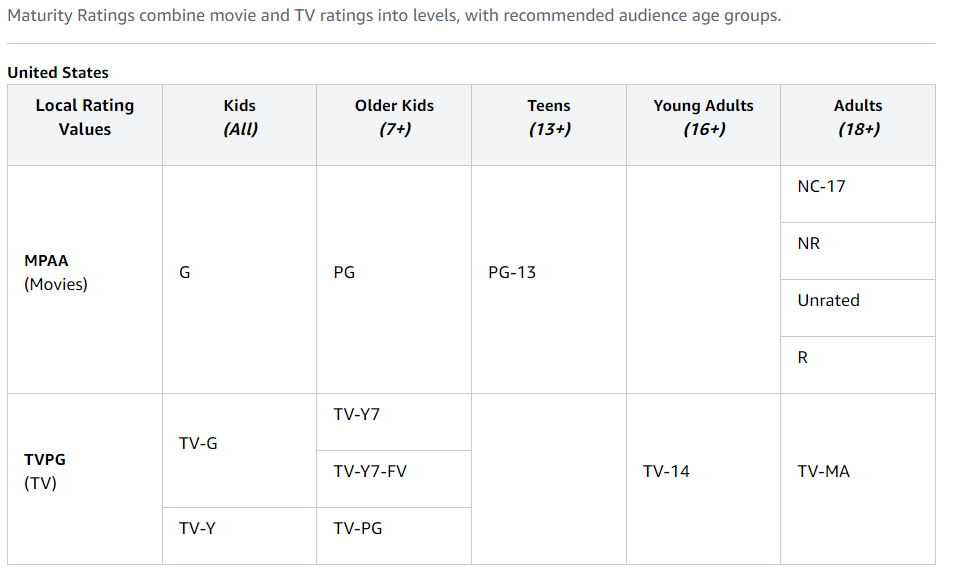

In [ ]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

# **Exploratory Data Analysis(EDA)**

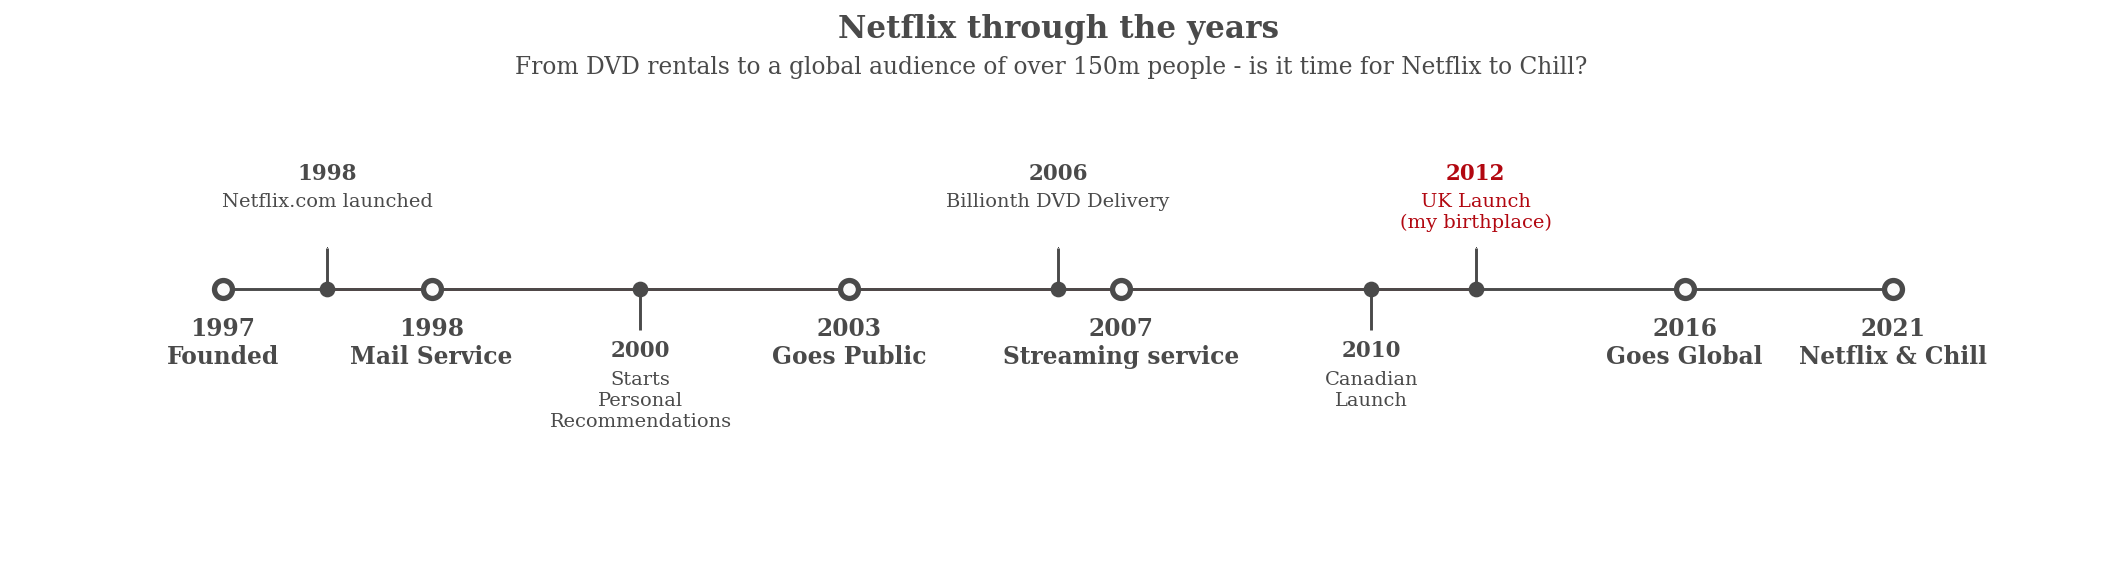

##**Analyze the type of content available on Netflix**

No handles with labels found to put in legend.


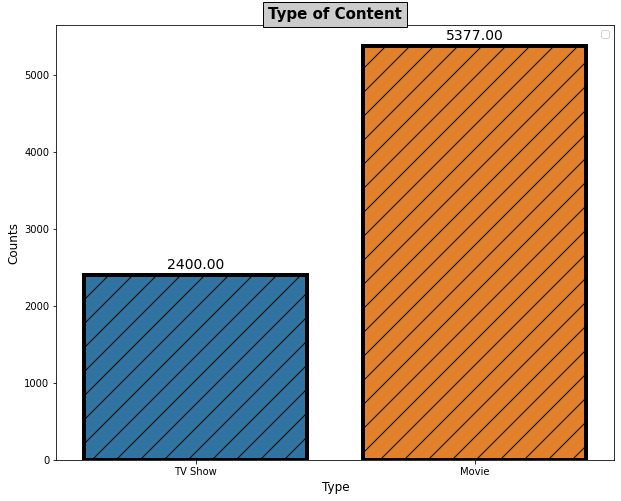

In [ ]:
# Ploting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='black',
                  hatch='/')
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

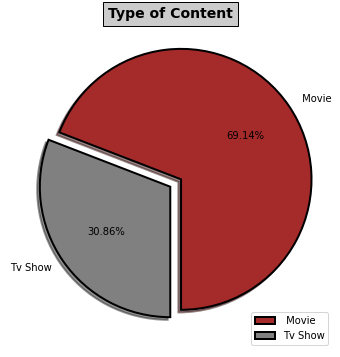

In [ ]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Movie",'Tv Show']
values = netflix_df['type'].value_counts().values

# Ploting the graph
myexplode = [0.1, 0]
colors = ['brown', 'grey']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Type of Content', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### **Observations:** 
* It is evident that there are more movies on Netflix than TV shows. 

* Netflix has 5377 movies, which is more than double the quantity of TV shows.

## **Movie ratings analysis**

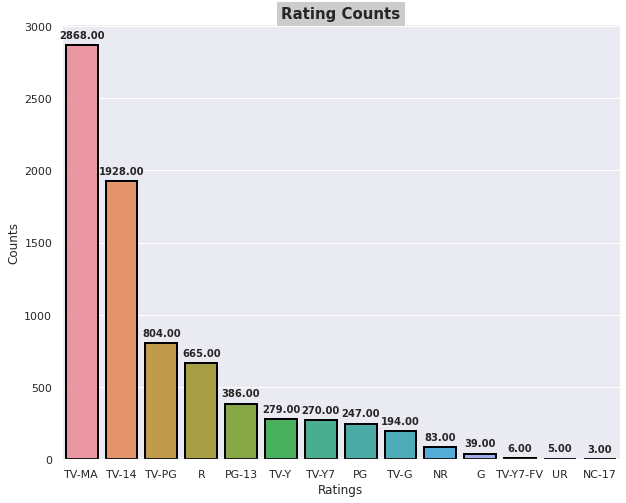

In [ ]:
# Ploting the countplot for the ratings
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')

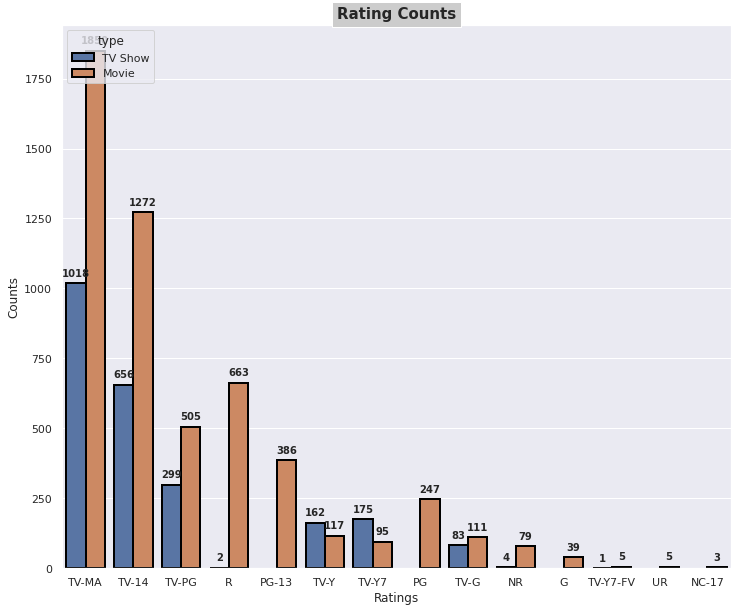

In [ ]:
# Ploting the countplot for movie and Tv show ratings
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',hue='type',
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')

**Observations:**


*   The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.

*   The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.


*   The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian."







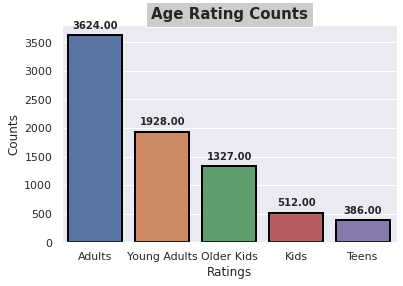

In [ ]:
# Countplot for Adult, Teen, Kids, Older Kids
ax=sns.countplot('age_rating',data=netflix_df,lw=2, ec='black',
                  order = netflix_df['age_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')

### **Observations:**
*  We can observe from the above count plot that the majority of Netflix material is intended for adults. There is very little content available for teens and kids.

## **Growth in content over the years**

Text(0.5, 0, 'Added Year')

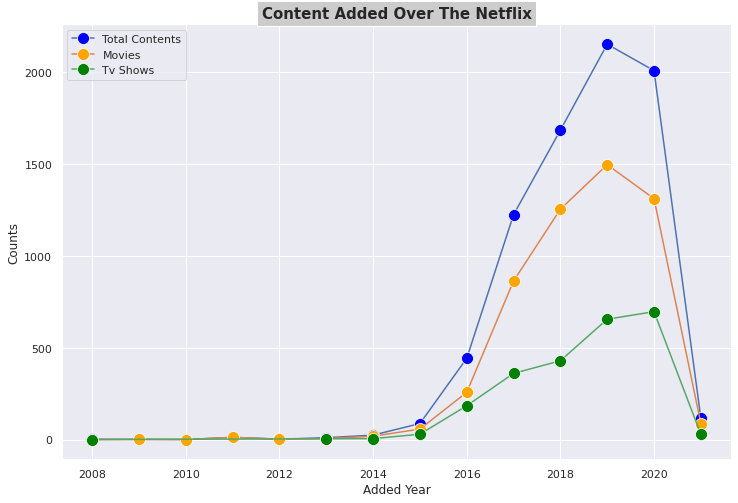

In [ ]:
# Plotting the graph for the growth of contents over the netflix
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

tv = df_tv[col].value_counts().reset_index().sort_values('index')
tv = tv.rename(columns = {col : "count", "index" : col})
tv = tv.sort_values(col)

movies = df_movies[col].value_counts().reset_index().sort_values("index")
movies = movies.rename(columns = {col : "count", "index" : col})
movies = movies.sort_values(col)

total = netflix_df[col].value_counts().reset_index().sort_values("index")
total = total.rename(columns = {col : "count", "index" : col})
total = total.sort_values(col)



trace3 = sns.lineplot(x=total[col], y=total["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=movies[col], y=movies["count"], data=df_movies,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=tv[col], y=tv["count"], data=df_tv,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'green', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added Over The Netflix",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Year')



### **Observations:**

* The number of movies on Netflix is growing significantly faster than the number of TV shows.

* In both 2018 and 2019, approximately 1200 new movies were added.

* We saw a huge increase in the number of movies and television episodes after 2014.

* Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.

* It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.

## **Month wise Analysis of content**

Text(0.5, 0, 'Added Month Name')

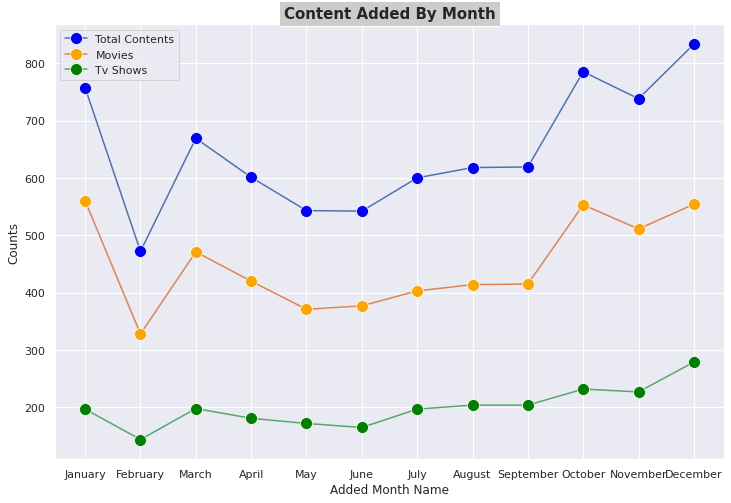

In [ ]:
# Plotting the graph for the content added by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "month_name_added"

dfm1 = df_tv[col].value_counts().reset_index()
dfm1= dfm1.rename(columns = {col : "count", "index" : col})
dfm1['month_name_added'] = pd.Categorical(dfm1['month_name_added'],month_order)
dfm1.sort_values('month_name_added').reset_index(drop='index')

dfm2 = df_movies[col].value_counts().reset_index()
dfm2 = dfm2.rename(columns = {col : "count", "index" : col})
dfm2['month_name_added'] = pd.Categorical(dfm2['month_name_added'],month_order)
dfm2.sort_values('month_name_added').reset_index(drop='index')


dfm3 = netflix_df[col].value_counts().reset_index().sort_values("index")
dfm3 = dfm3.rename(columns = {col : "count", "index" : col})
dfm3['month_name_added'] = pd.Categorical(dfm3['month_name_added'],month_order)
dfm3.sort_values('month_name_added').reset_index(drop='index')



trace3 = sns.lineplot(x=dfm3[col], y=dfm3["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=dfm2[col], y=dfm2["count"], data=df_movies,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=dfm1[col], y=dfm1["count"], data=df_tv,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'green', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added By Month",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Month Name')

### **Observations:**

* The above graph shows that the most content is added to Netflix in December.
* In February, Netflix adds extremely few new movies and television episodes.

# **Release Year Analysis**

Text(0.5, 1.0, 'Cumulative')

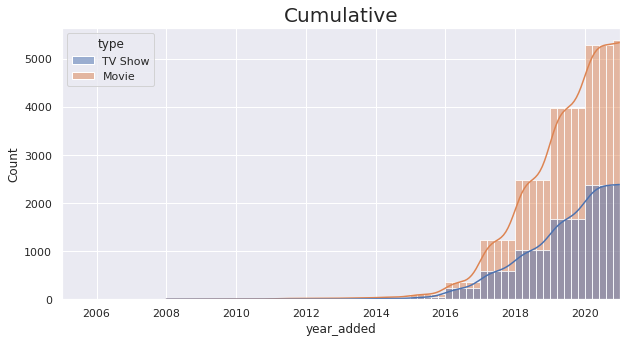

In [ ]:
plt.figure(figsize= (10,5))
ax=sns.histplot(x= netflix_df.year_added, hue= netflix_df.type, kde= True, cumulative= True)
plt.xlim(2005,2021)
plt.title("Cumulative", fontsize= 20)

Text(0.5, 0, 'Release Year')

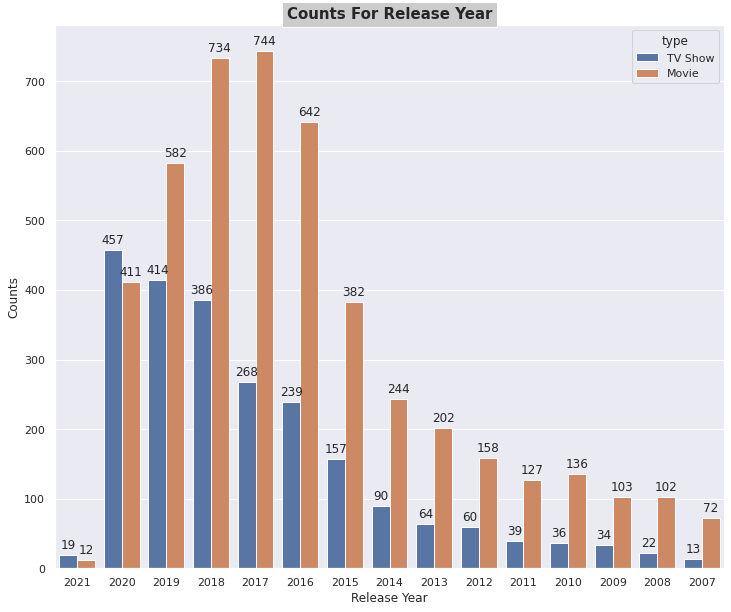

In [ ]:
# Ploting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('release_year',data=netflix_df,hue='type',
              order=[2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
                     ,2009,2008,2007])
# We take only those year under consideration, onwards which netflix starts streaming services.

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Release Year')


### **Observations:**

* According to the following countplot, 774 movies were released in 2017, which is the most number of releases in any year.

* According to the above countplot, there will be 457 television shows released in 2020, which is the most of any year.

# **Country Analysis**

Text(0, 0.5, 'Country Name')

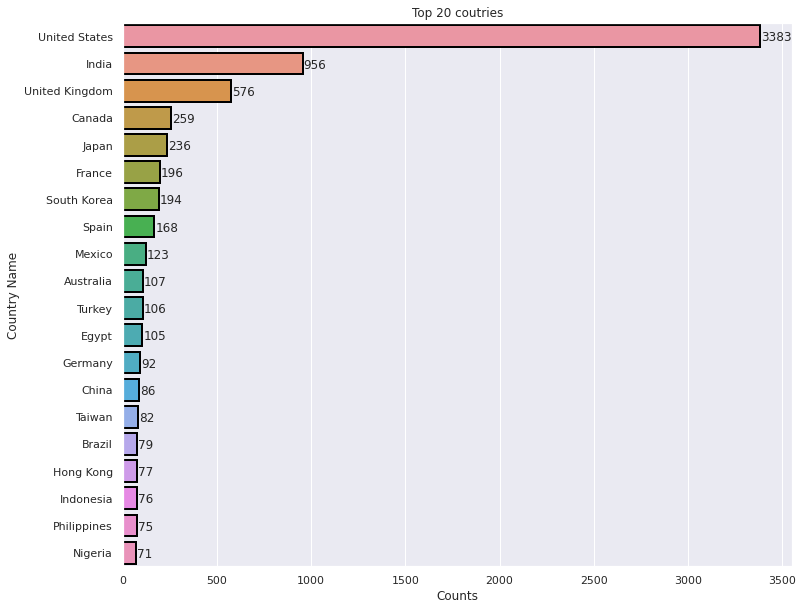

In [ ]:
# Top 20 countries on Netflix
plt.figure(figsize=(12,10))
ax=sns.countplot(y='principal_country',lw=2, ec='black',data=netflix_df,
              order=netflix_df['principal_country'].value_counts().index[0:20])
# Adding Annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center',fontsize=12)
plt.title('Top 20 coutries')
plt.xlabel('Counts')
plt.ylabel('Country Name')

### **Observations:**
* The United States is the most prolific generator of Netflix content, with India and the United Kingdom trailing far behind.


##**How does content differ by country in the top ten lists?**

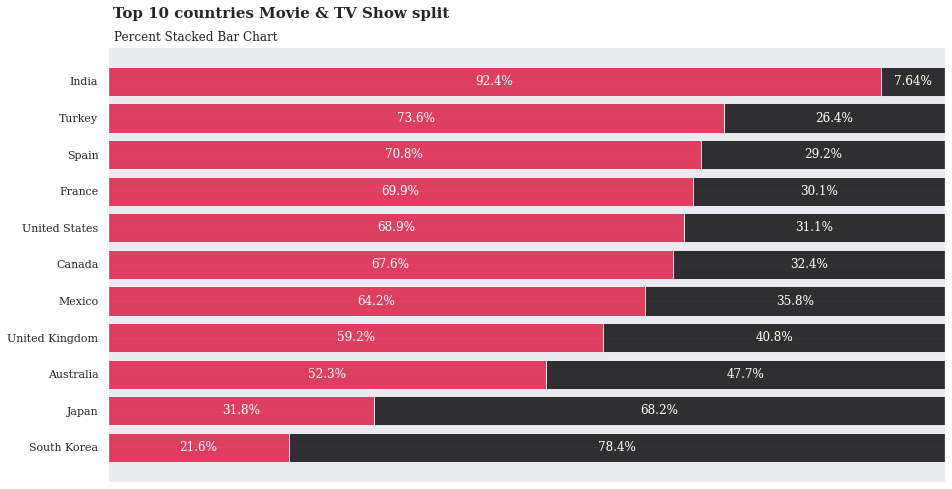

In [ ]:
# Ploting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(content_data_ratio.index, fontfamily='serif', fontsize=11)

# Addind Annotaion
for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['Movie'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')

for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]+content_data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, 
        fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

plt.show()

### **Observations:**

* The majority of the content on Netflix in India is comprised of movies.

* Bollywood is a significant business, and movies, rather than TV shows, may be the industry's major focus.

* South Korean Netflix on the other hand is almost entirely TV Shows.

* The fundamental reason for the variation in content must be due to market research undertaken by Netflix.

# **Distribution of Movie Duration**

90     136
93     131
91     125
94     125
95     119
92     118
97     117
96     115
98     106
99     101
88     101
103    101
102     98
106     97
100     97
101     96
86      93
105     91
104     89
89      88
Name: duration, dtype: int64

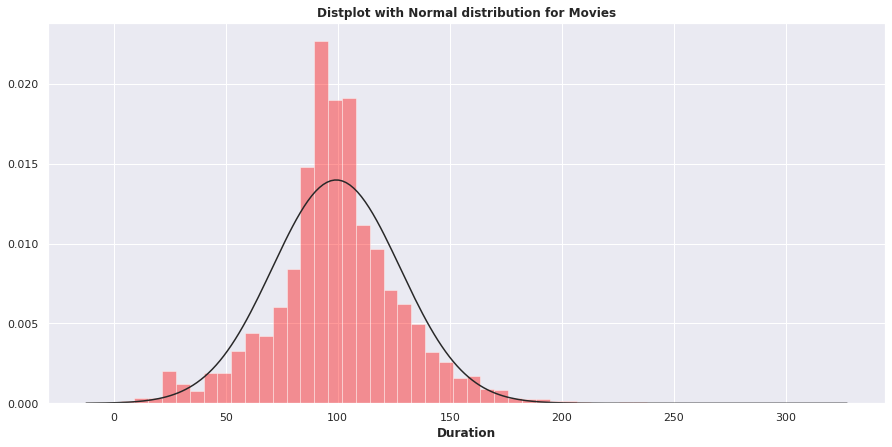

In [ ]:
# Importing Norm Distrbution 
from scipy.stats import norm

# Ploting the distplot
time_df=df_movies['duration'].str.extract('(\d+)')
time_df=time_df.rename(columns={0:'duration'})
time_df
plt.figure(figsize=(15,7))
sns.distplot(time_df['duration'],fit=norm,kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.xlabel('Duration',fontweight="bold")
time_df['duration'].value_counts()[0:20]

### Observations:
* The majority of the films are between 85 and 120 minutes long, which is appropriate.

## **Movie's Duration Trends**

Text(0.5, 0, 'Year of release')

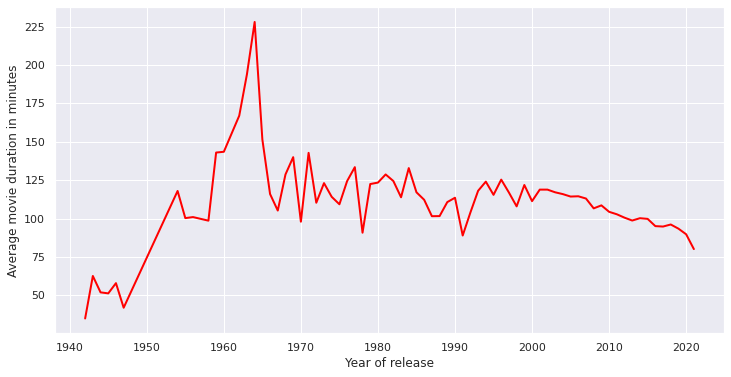

In [ ]:
# Extacting the length of movie
df_movies['minute'] = df_movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = df_movies.groupby(['release_year'])['minute'].mean()
duration_df=pd.DataFrame(duration_year)

# Ploting the graph
plt.figure(figsize=(12,6))

sns.lineplot(x=duration_df.index, y=duration_df.minute,linewidth=2,
             linestyle = 'solid',color='red')
             

plt.ylabel('Average movie duration in minutes')
plt.xlabel('Year of release')



### **Observation:**

* Movies made before 1948 have a short average duration, compared to those released after 1948.

* The average movie's duration released during the 1960 era was the longest.

*  At the beginning of the twentieth century, the average length of a film was decreasing over time.


## **Average Movie Duration Vs Rating**

Text(0.5, 1.0, 'Average Movie Duration Vs Rating')

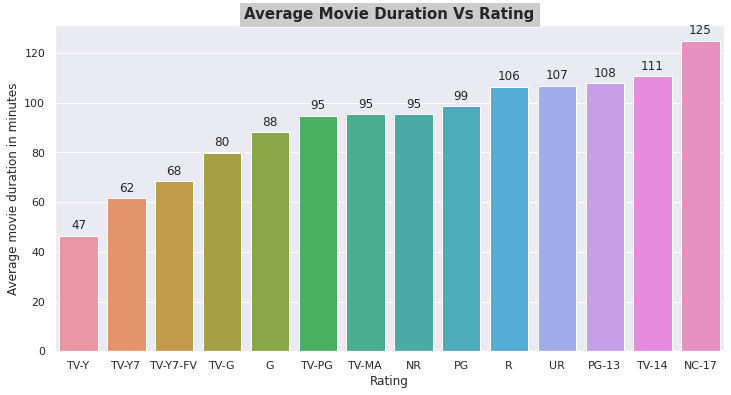

In [ ]:
df_movies['minute'] = df_movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = df_movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

plt.ylabel('Average movie duration in minutes')
plt.xlabel('Rating')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Average Movie Duration Vs Rating",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})


### **Observations:**

* Those movies that have a rating of NC-17 have the longest average duration.

* When it comes to movies having a TV-Y rating, they have the shortest runtime on average.

Text(0, 0.5, 'Number of Seaons')

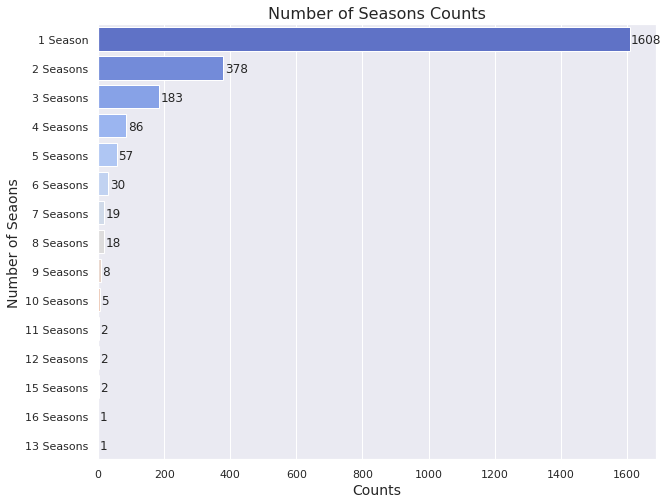

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot(y='duration',data=df_tv,order=df_tv['duration'].
                 value_counts().index,palette="coolwarm")
# Adding Annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center',fontsize=12)
plt.title('Number of Seasons Counts' ,fontsize=16)
plt.xlabel('Counts',fontsize=14)
plt.ylabel('Number of Seaons',fontsize=14)

### **Observation:** 

* According to the above counterplot, each of the 1608 television shows had only one season.

* There were extremely few television shows that had more than six seasons.

## **Analysis of Movie Genres**

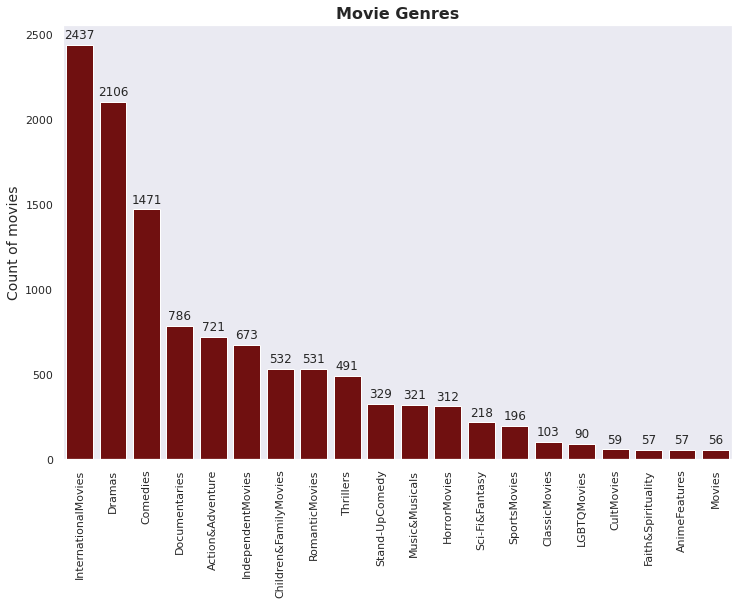

In [ ]:
# Importing the Counter
from collections import Counter

# Counting the genres for the movies
genres=list(df_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)


g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

# Ploting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(g.keys())
y=list(g.values())
ax=sns.barplot(x,y, color='maroon')

# set a title
plt.title("Movie Genres", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Observations:**

* As a result, it is evident that international movies, dramas, and comedies are the top three genres with the most content on Netflix.


## **Analysis of Tv Show Genres**

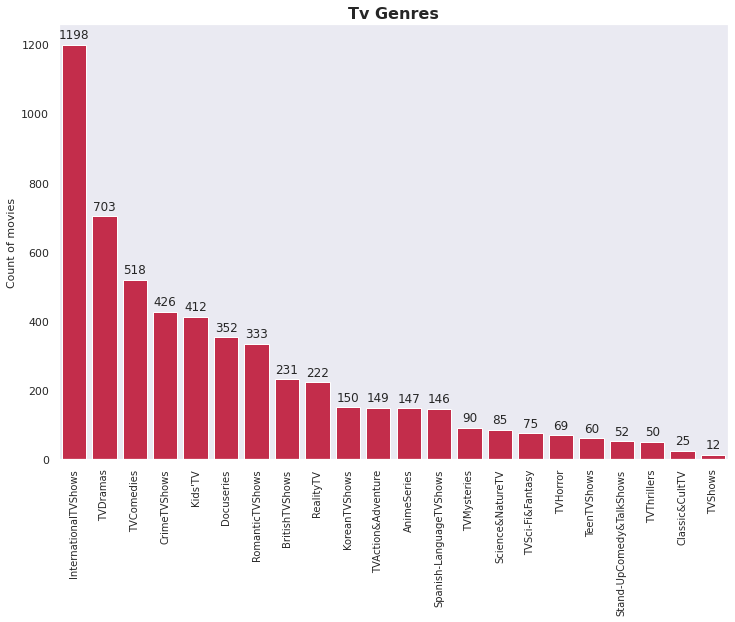

In [ ]:
# Countng the genres for tv shows
genres=list(df_tv['listed_in'])
gen=[]
for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

# Ploting the graph
plt.figure(figsize = (12, 8))
x=list(g.keys())
y=list(g.values())
ax=sns.barplot(x,y,color='crimson')

# set a title
plt.title("Tv Genres", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90, fontsize=10)
plt.ylabel("Count of movies", fontsize=11)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Observations:**

* As a result, it is evident that international tv shows, tv dramas, and tv comedies are the top three genres with the most content on Netflix.

# **Genres Analysis**

In [ ]:
# Importing MultiLabelBinarizer 
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors





# Define the fucntion to create the heatmap for the genres
def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    # Creating the Heatmap
    pl = sns.heatmap(corr, mask=mask, cmap="YlGnBu",vmax=.3, vmin=-.3, square=True, center=0, linewidths=2.5)
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


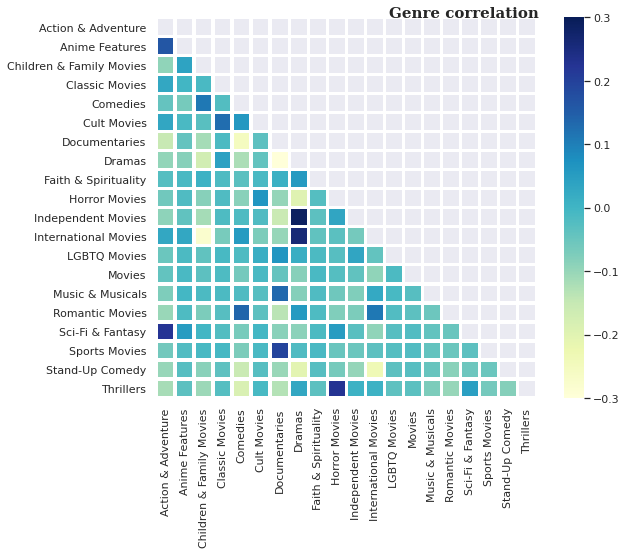

In [ ]:
# Using the above function creating the genres heatmap for the movies
genre_heatmap(df_movies, 'Movie')

plt.show()

**Observations:**

* It is interesting that International Movies tend to be Dramas. 
             
* Another observation is that International Movies are rarely in the Children's genres.

# **Netflix Content for different age groups in top 10 countries**

In [ ]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']


df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['principal_country'],df_heatmap['age_rating'],normalize = "index").T
df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


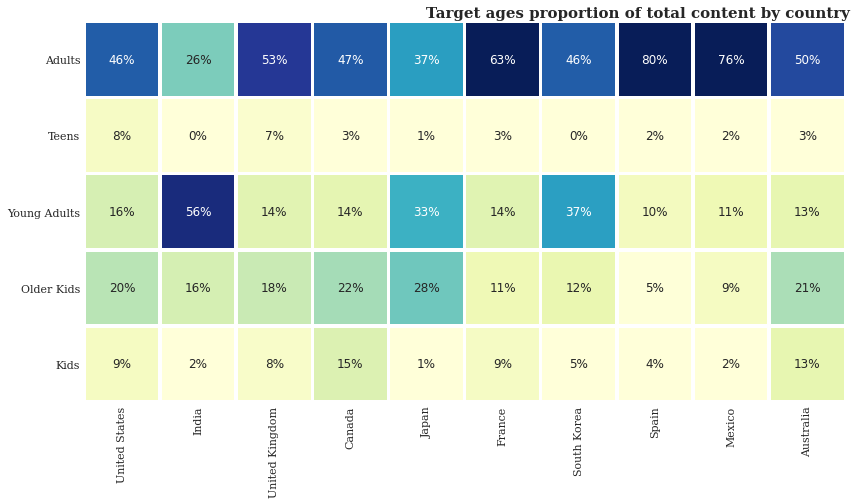

In [ ]:
# Ploting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Australia']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### **Observations:**

* It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

* Also, Mexico and Spain have similar content on Netflix for different age groups.

# **Top 10 directors who create the most content**

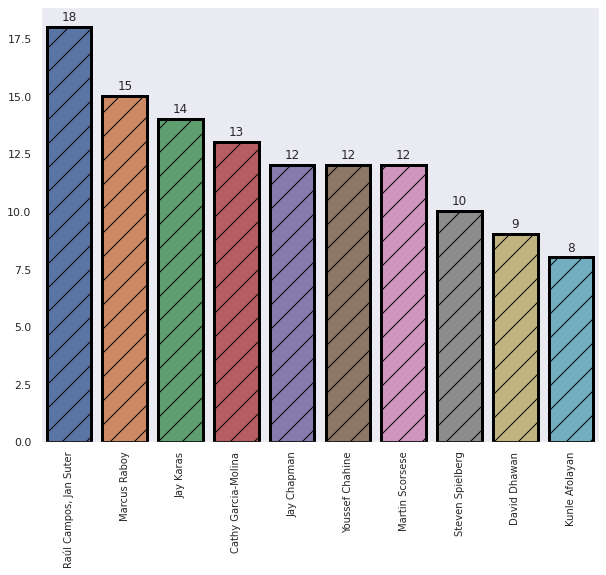

In [ ]:
# Top 10 most Productive Movie Directors
plt.figure(figsize=(10,8))
x=df_movies['director'].value_counts().index[1:11]
y=df_movies['director'].value_counts().values[1:11]
ax=sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.xticks(rotation = 90, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Obsevations:**

* The Directors who produce the most material are Raul Campos and Jan Sutler. They work in 18 movies as a director.
* David Dhawan is ranked second among top directors, having directed 15 films.


# **Top 10 Actors who appear in the majority of films**

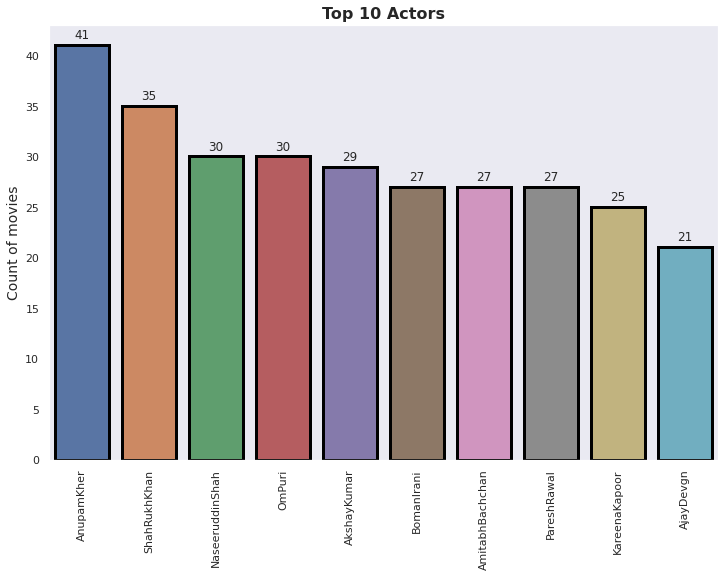

In [ ]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(df_movies['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
movie_cast=Counter(cast)


movie_cast={k: v for k, v in sorted(movie_cast.items(), key=lambda item: item[1], reverse= True)}

# Ploting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(movie_cast.keys())
y=list(movie_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Observations**: 

* According to the above barplot, Anupam Kher has worked in over 40 films.

* After Anupam Kher, Shahrukh Khan is ranked second, with 35 films under his belt.

* Naseeruddin Shah and Ompuri have worked in 30 films.


# **Top 10 Actors who appear in the majority of films**

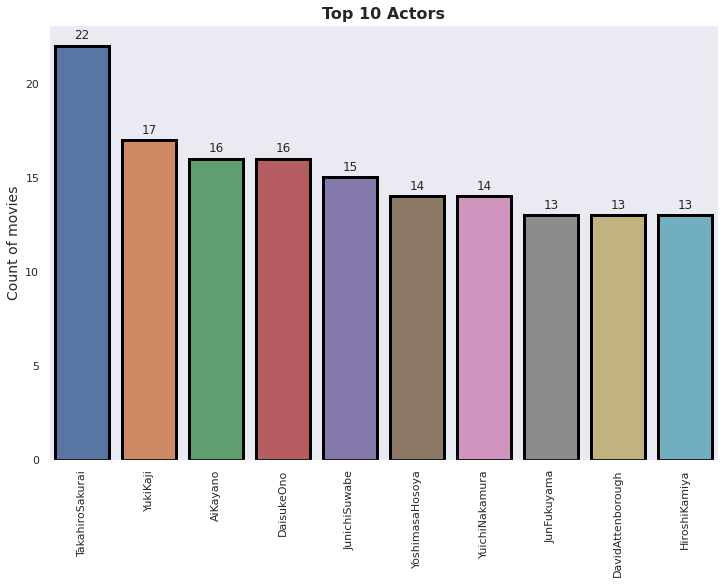

In [ ]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(df_tv['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
tv_cast=Counter(cast)


tv_cast={k: v for k, v in sorted(tv_cast.items(), key=lambda item: item[1], reverse= True)}

# Ploting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(tv_cast.keys())
y=list(tv_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Observations**: 

* According to the above barplot, Takahiro Sakurai has worked in over 20 tv shows.

* After Takahiro Sakurai, Yuki Kaji is ranked second, with 17 tv shows under his belt.

* Aikayano and Daisuke Ono have worked in 16 tv shows.